# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


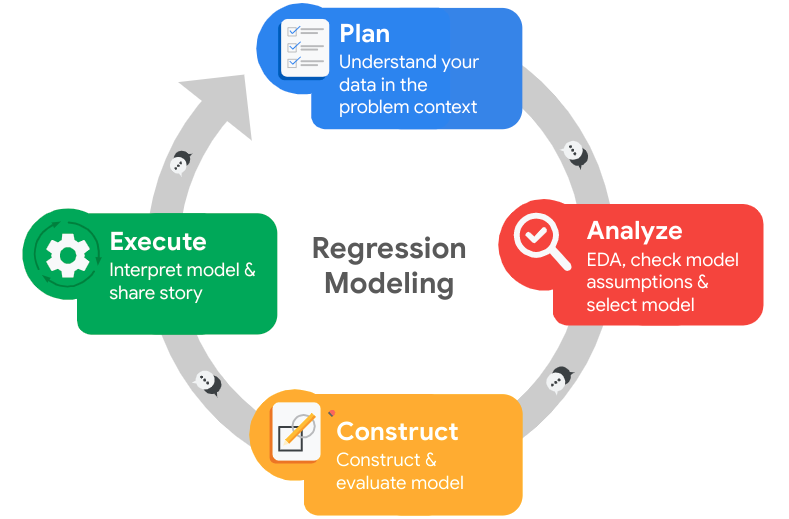

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project? Salifort HR deparment
- What are you trying to solve or accomplish? Find out if an employee is going to leave the company
- What are your initial observations when you explore the data? The columns that holds personal identity information are missing which is good ethical thing to do. 
- What resources do you find yourself using as you complete this stage? All my past google exercises (Make sure to include the links.)
- Do you have any ethical considerations in this stage? As stated above I have no ethical concern because the employees personal information isn't included in this dataset. 




[Double-click to enter your responses here.]

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [111]:
# Import packages
### YOUR CODE HERE ### 
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Import packages
### YOUR CODE HERE ### 

# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

# For data modeling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

# For saving models
import pickle

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
### YOUR CODE HERE ###
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
### YOUR CODE HERE ###
print(df0.info())

#Checking unique values of categorical variables to see any error in the data and also get more information about the column

print(df0['salary'].unique())

print(df0['Department'].unique())

print(df0['left'].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB
None
['low' 'medium' 'high']
['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
[1 0]


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###
df0.describe(include='all')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
# Display all column names
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename columns as needed
### YOUR CODE HERE ###
df0_renamed = df0.rename(columns={'Work_accident':'work_accident', 'Department':'department', 
                                  'average_montly_hours':'average_monthly_hours',
                                 'time_spend_company':'tenure'})

# Display all column names after the update
### YOUR CODE HERE ###
df0_renamed.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [7]:
# Check for missing values
### YOUR CODE HERE ###
df0_renamed.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [8]:
# Check for duplicates
### YOUR CODE HERE ###
df0_renamed.duplicated().sum()

3008

In [9]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###
df0_renamed[df0_renamed.duplicated()].head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [10]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###
df0_subset = df0_renamed.drop_duplicates(keep = 'last')

# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###
display(df0_subset.head())

print(df0_subset.duplicated().sum())

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
783,0.36,0.46,2,132,3,0,1,0,sales,low
784,0.44,0.57,2,131,3,0,1,0,sales,low
785,0.85,0.99,5,248,5,0,1,0,sales,low
786,0.78,0.93,5,225,5,0,1,0,sales,low
787,0.39,0.46,2,156,3,0,1,0,sales,low


0


### Check outliers

Check for outliers in the data.

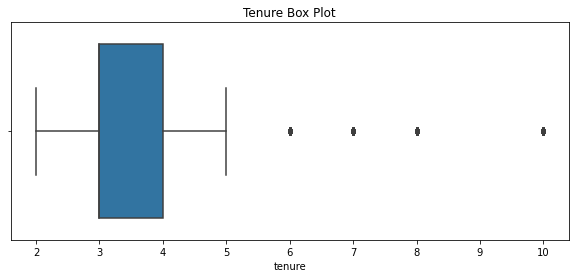

In [11]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
### YOUR CODE HERE ###
plt.figure(figsize = (10,4))
sns.boxplot(df0_subset['tenure'])
plt.title('Tenure Box Plot')
plt.show()


In [12]:
# Determine the number of rows containing outliers
### YOUR CODE HERE ###
#find interquantile 25 and 75
q25 = df0_subset['tenure'].quantile(.25)
q75 = df0_subset['tenure'].quantile(.75)

#find IQR
IQR = q75 - q25

#find whiskers
lower_whisker = q25 - (1.5 * IQR)
upper_whisker = q75 + (1.5 * IQR)

#find the dataframe with outliers
df0_subset[(df0_subset['tenure'] < lower_whisker) | (df0_subset['tenure'] > upper_whisker)].shape

(824, 10)

Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [13]:
# Get numbers of people who left vs. stayed
### YOUR CODE HERE ###
print(df0_subset.groupby('left').agg({'left':'count'}), '\n')
# Get percentages of people who left vs. stayed
### YOUR CODE HERE ###
print(df0_subset['left'].value_counts(normalize = True))

       left
left       
0     10000
1      1991 

0    0.833959
1    0.166041
Name: left, dtype: float64


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

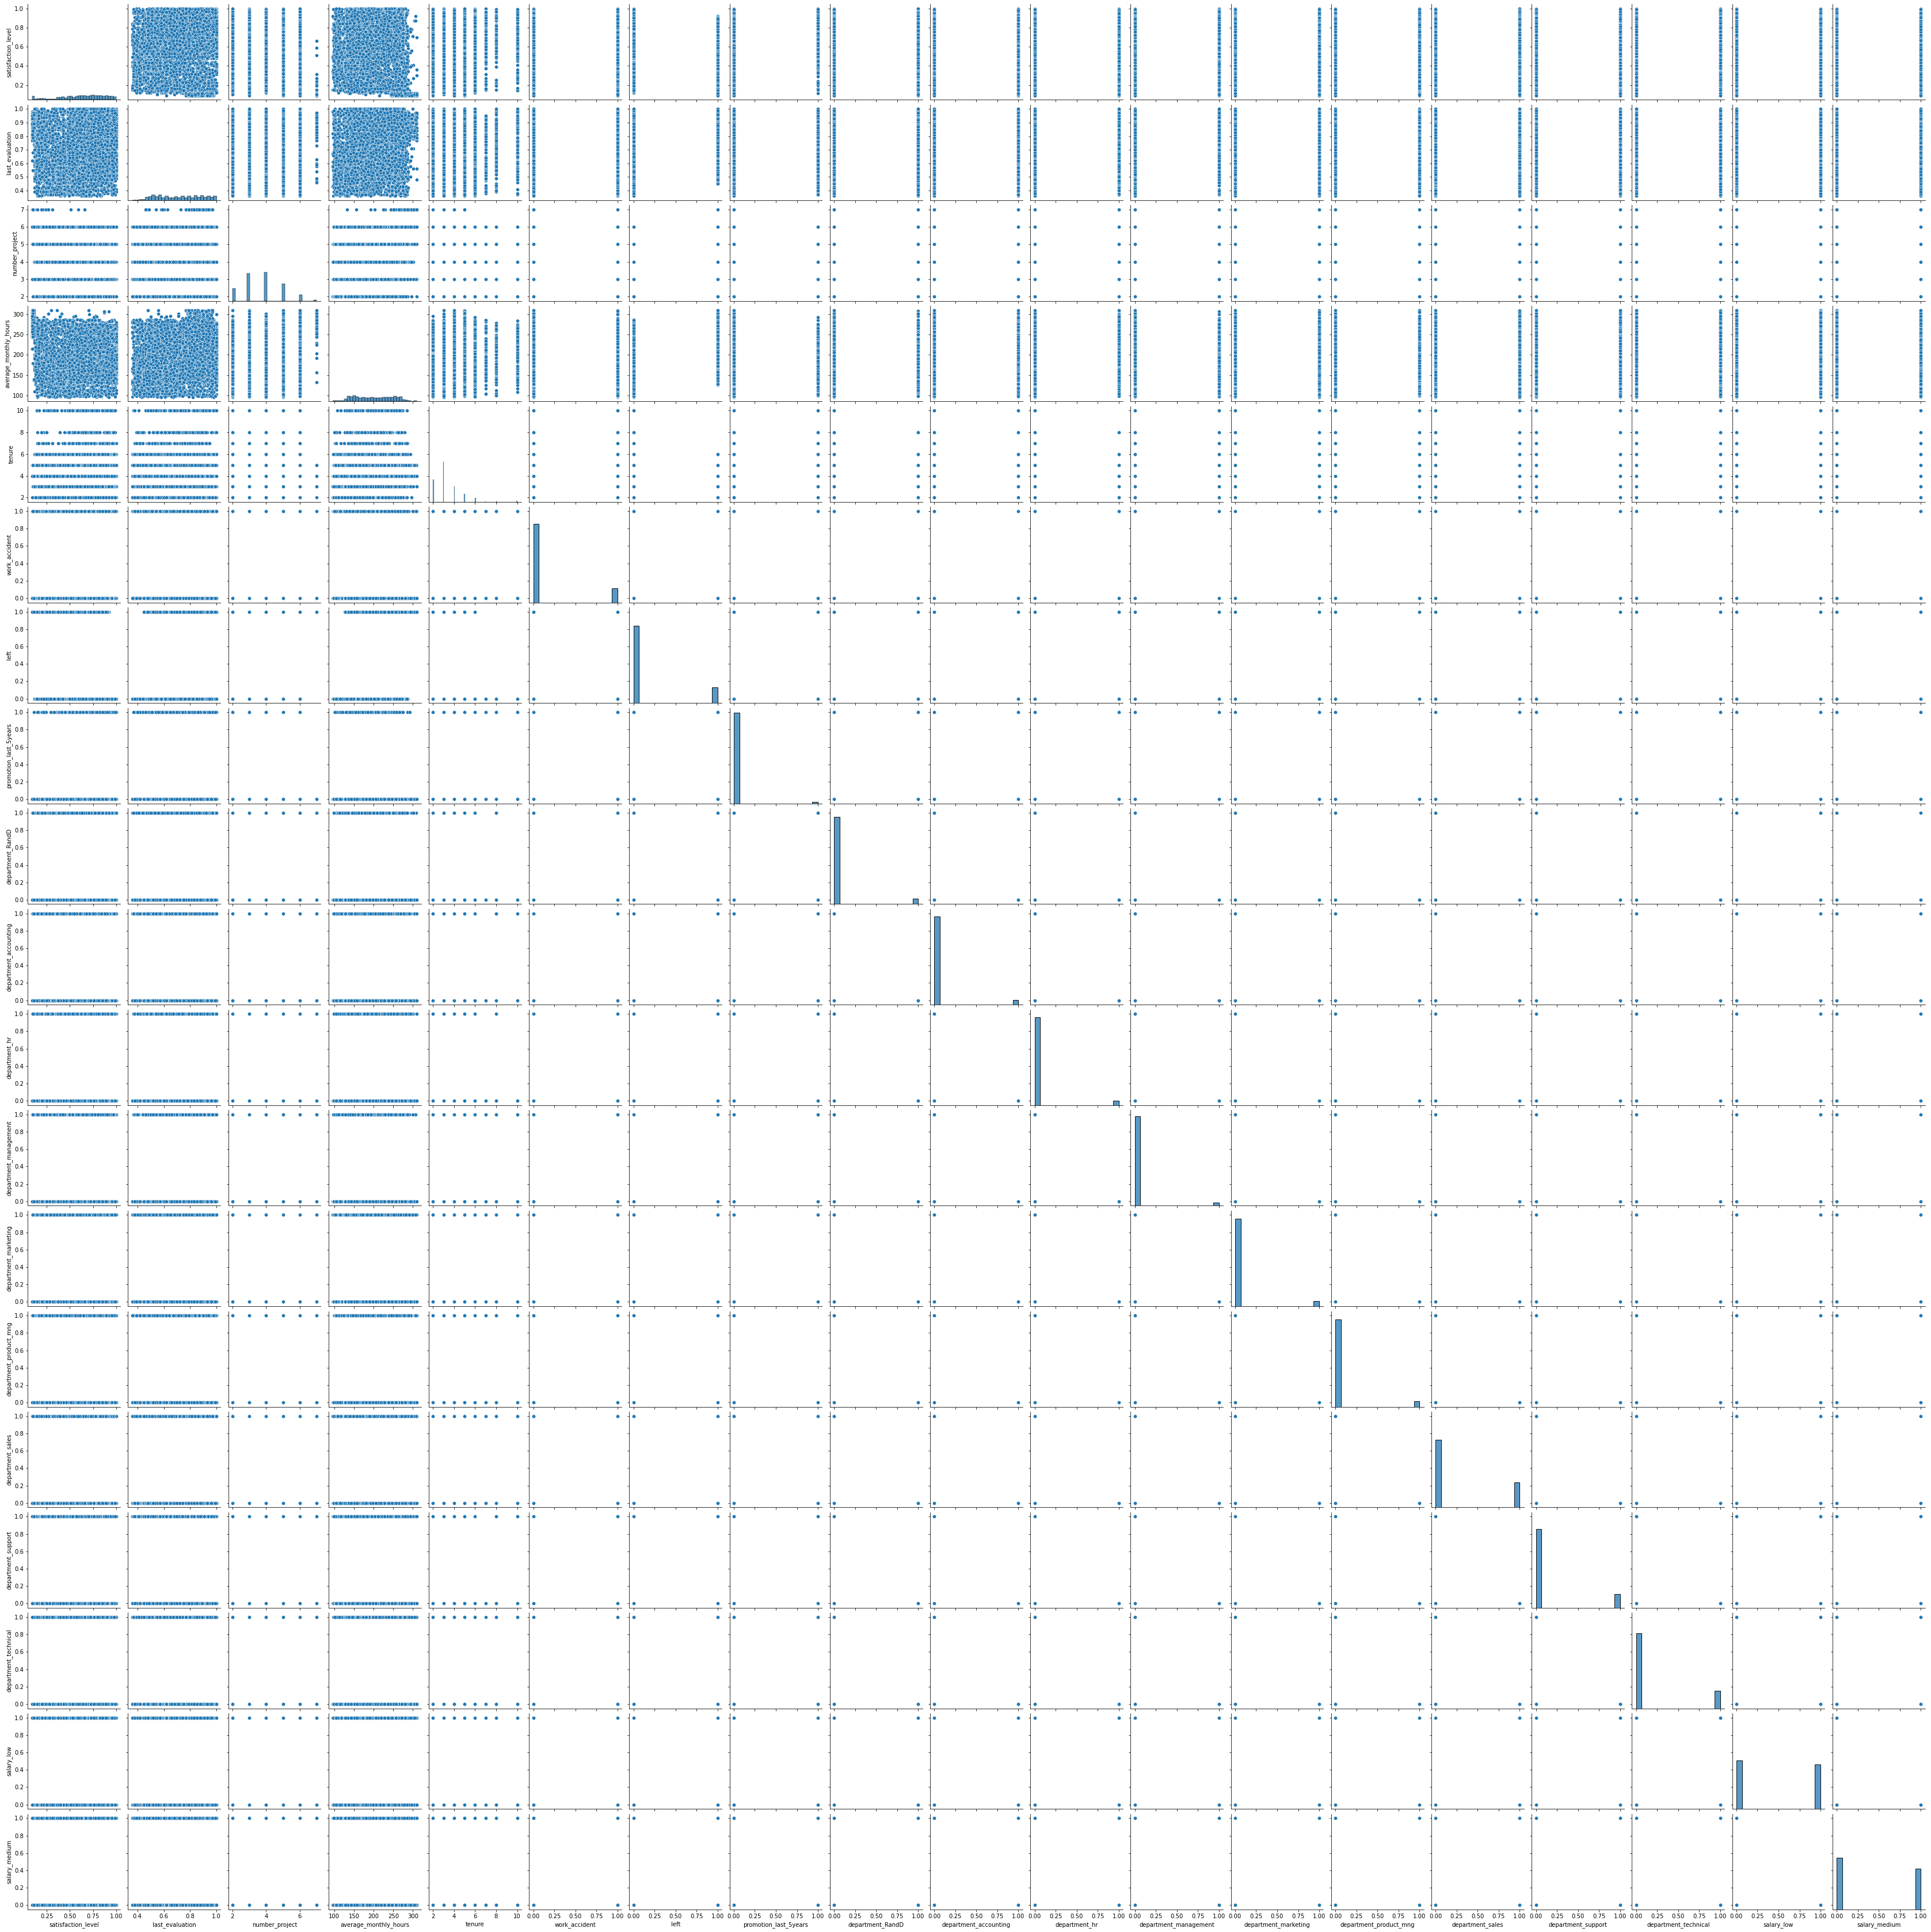

In [76]:
# Create a plot as needed
### YOUR CODE HERE ###

#I want to see the pairplots to see anything that stands out that I want to explore further special in relation with the left column
sns.pairplot(pd.get_dummies(df0_subset, drop_first = True))

Wanted to see the pairplot correlation between variables. I turned the categorical variable into dummy variables in order to have the big picture. (Note: This code will run for a few seconds.)

- There is no note worthy relationship that is shown in the pair plot sadly 

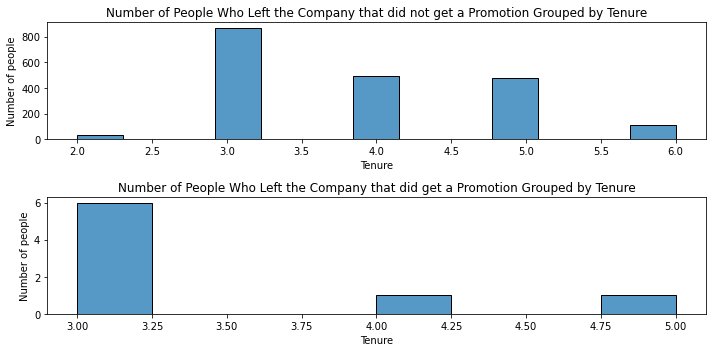

promotion_last_5years  left
0                      0       0.831778
                       1       0.168222
1                      0       0.960591
                       1       0.039409
Name: left, dtype: float64 

0    0.983071
1    0.016929
Name: promotion_last_5years, dtype: float64 



In [56]:
# Create a plot as needed
### YOUR CODE HERE ###
#pair plots didn't really show a clear linear or logistic relationship between variables
#I want to see if people leaving is connected with promotion_last_5years
fig, axs = plt.subplots(2,1,figsize = (10,5))
sns.histplot(df0_subset[(df0_subset['left']==1) & (df0_subset['promotion_last_5years']==0)]['tenure'], ax = axs[0])
axs[0].set_xlabel('Tenure')
axs[0].set_ylabel('Number of people')
axs[0].set_title('Number of People Who Left the Company that did not get a Promotion Grouped by Tenure')
sns.histplot(df0_subset[(df0_subset['left']==1) & (df0_subset['promotion_last_5years']==1)]['tenure'], ax = axs[1])
axs[1].set_xlabel('Tenure')
axs[1].set_ylabel('Number of people')
axs[1].set_title('Number of People Who Left the Company that did get a Promotion Grouped by Tenure')
plt.tight_layout()
plt.show()

#Checking the ratio of people leaving group by tenure and promotion
print(df0_subset.groupby(by = ['promotion_last_5years'])['left'].value_counts(normalize=True),'\n')

#further checking how many people do get promoted
print(df0_subset['promotion_last_5years'].value_counts(normalize=True),'\n')

- As you can see there are lower turn overs when a person is promoted. To be exact only 3.9% of people that are promoted leave the company meaning that 96.1% choose to stay if they are promoted.
- We can also see that the people who left the company worked there for 2 to 6 years before leaving.
- Further checking the chance of promotion within 5 years is only 1.7%, which probably why we see that our turn overs are between 2-6 years of working for the company.

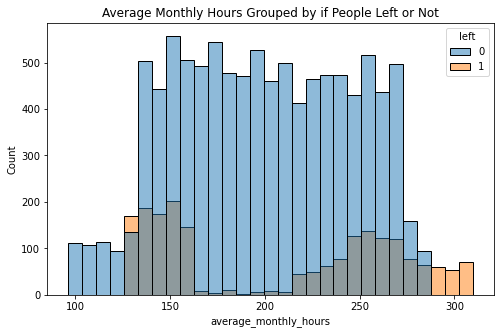

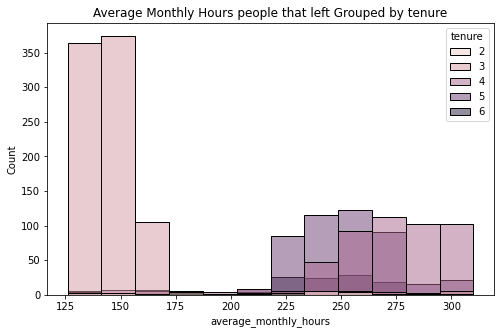

In [75]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize = (8,5))
sns.histplot(data = df0_subset, x = 'average_monthly_hours',hue = 'left')
plt.title('Average Monthly Hours Grouped by if People Left or Not')
plt.show()

#exploring more about relationship with people that leave and monthly hours
plt.figure(figsize = (8,5))
sns.histplot(data = df0_subset[df0_subset['left']==1], x = 'average_monthly_hours',hue = 'tenure')
plt.title('Average Monthly Hours people that left Grouped by tenure')
plt.show()

- You can see that as you go away from the mean of the people who didn't leave you can observe more people leaving. It is interesting that there is a a spkie of people leaving around 150 hours and it lowers again.
- It looks like people who quit with a monthly average hour between 125-175 tends to be people who worked for the company for 3 years

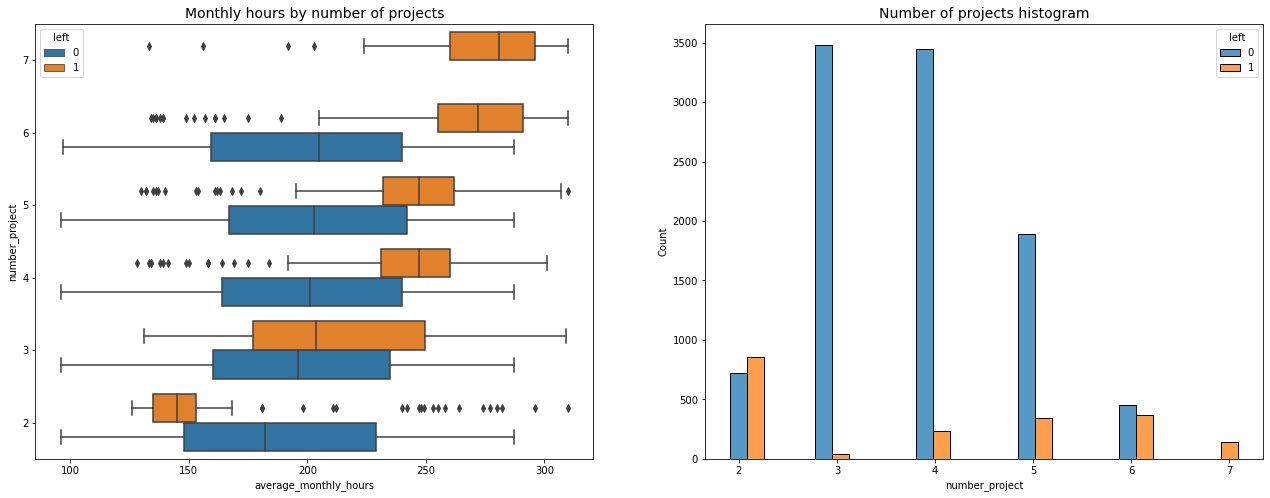

In [74]:
# Create a plot as needed
### YOUR CODE HERE ###
# Create a plot as needed 
### YOUR CODE HERE ###

# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Create boxplot showing `average_monthly_hours` distributions for `number_project`, comparing employees who stayed versus those who left
sns.boxplot(data=df0_subset, x='average_monthly_hours', y='number_project', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Monthly hours by number of projects', fontsize='14')

# Create histogram showing distribution of `number_project`, comparing employees who stayed versus those who left
tenure_stay = df0_subset[df0_subset['left']==0]['number_project']
tenure_left = df0_subset[df0_subset['left']==1]['number_project']
sns.histplot(data=df0_subset, x='number_project', hue='left', multiple='dodge', shrink=2, ax=ax[1])
ax[1].set_title('Number of projects histogram', fontsize='14')

# Display the plots
plt.show()

- We can see that people who have been assigned 7 projects quits which is most likely due being to over worked, and we also see that people who are assigned 2 projects have a high ratio of quitting. This might be because   

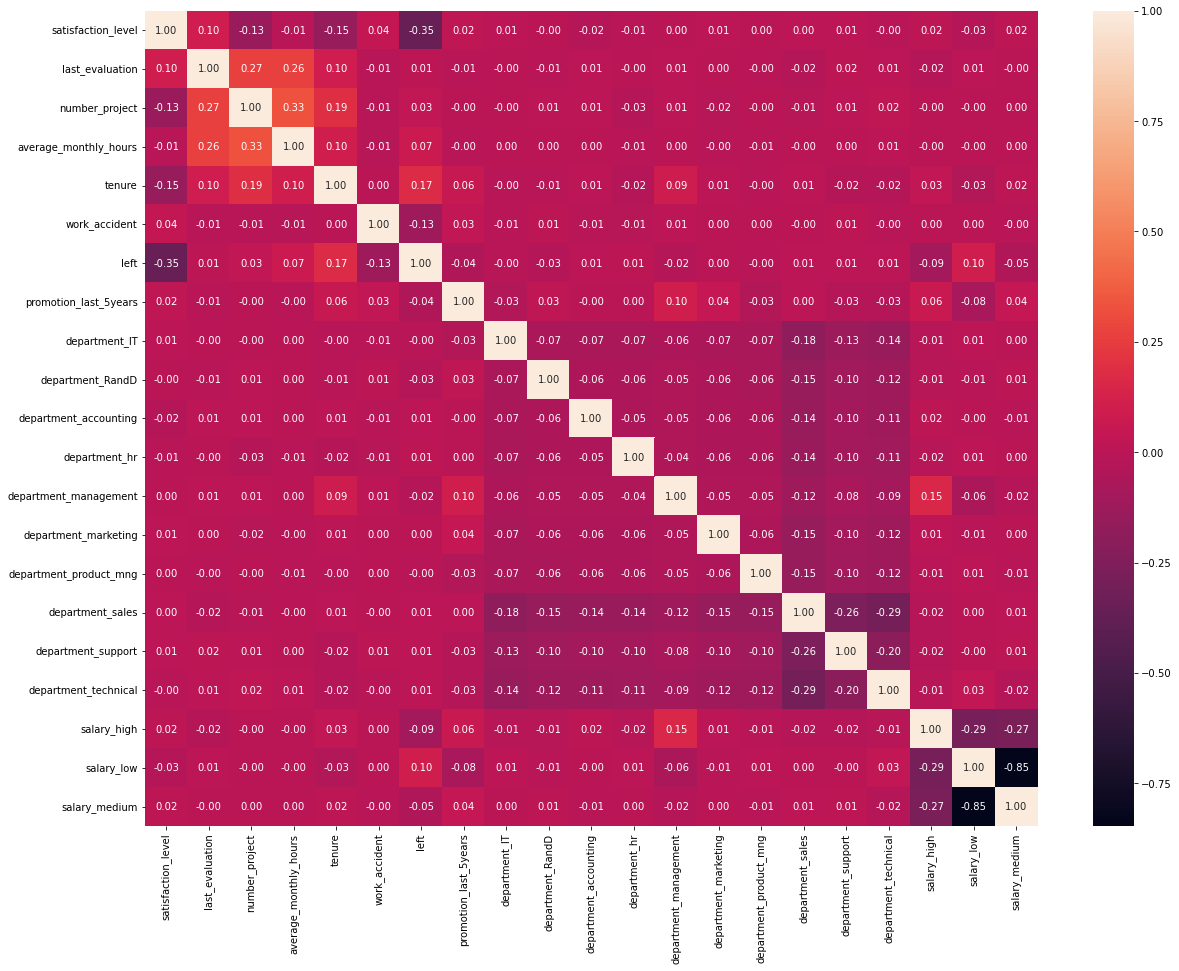

In [80]:
# Create a plot as needed
### YOUR CODE HERE ###

#I want to see the correlation of each variables
plt.figure(figsize=(20,15))
sns.heatmap(pd.get_dummies(df0_subset).corr(), annot = True, fmt = '.2f' )
plt.show()

- As you can see on the left row there is no high colleration between variables which is safe to say that it satisfy no multicollinearity

### Insights

[What insights can you gather from the plots you created to visualize the data? Double-click to enter your responses here.]

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



[Double-click to enter your responses here.]

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

Predict if a person will leave the company

### Identify the types of models most appropriate for this task.

Either Logistic regression, Random Forest will be a good model

### Modeling

Add as many cells as you need to conduct the modeling process.

### Logistic Regression Model

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
783,0.36,0.46,2,132,3.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
784,0.44,0.57,2,131,3.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
785,0.85,0.99,5,248,5.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
786,0.78,0.93,5,225,5.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
787,0.39,0.46,2,156,3.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0


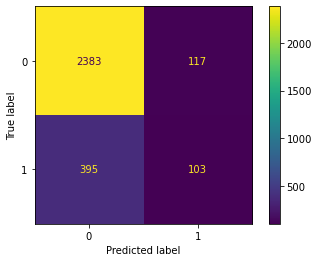

In [93]:
%%time
### YOUR CODE HERE ###

#logistic regression

#getting dummy variables for one hot encoding categorical variables
df0_dummies = pd.get_dummies(df0_subset)
df0_dummies.head()

#taking care of outliers for numerical value 

num_list = ['satisfaction_level','last_evaluation','number_project','average_monthly_hours','tenure']

def outlier_encoder(data, nlist):
    for name in nlist:
        #find interquantile 25 and 75
        q25 = data[name].quantile(.25)
        q75 = data[name].quantile(.75)

        #find IQR
        IQR = q75 - q25

        #find whiskers
        lower_whisker = q25 - (1.5 * IQR)
        upper_whisker = q75 + (1.5 * IQR)

        #find the dataframe with outliers
        data.loc[data[name] < lower_whisker,name] = lower_whisker
        data.loc[data[name] > upper_whisker,name] = upper_whisker
        
    return data
#calling function encoder to change outliears to upper whisker or lower whisker value
df0_logreg = outlier_encoder(df0_dummies, num_list)

#checking first few rows
display(df0_logreg.head())

#checking for class imbalance
print(df0_logreg['left'].value_counts(normalize = True))

#preparing for splitting data

#target variable
y = df0_logreg['left']

#features
X = df0_logreg.drop('left',axis=1)

#splitting train and test data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25,stratify=y, random_state = 69)

#instantiate the logistic regression model and fitting the model
log_clf = LogisticRegression(random_state=69, max_iter=500).fit(X_train, y_train)

#getting prediction values
y_pred = log_clf.predict(X_test)

#Making confusion matrix for log regression
log_cm = confusion_matrix(y_test, y_pred, labels=log_clf.classes_)

#displaying log regression confusion maric
log_disp = ConfusionMatrixDisplay(confusion_matrix = log_cm, display_labels = log_clf.classes_)

#plot the matrix
log_disp.plot(values_format = '')

plt.show()

In [98]:
# Create classification report for logistic regression model
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred, target_names=target_names))

10000
                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.95      0.90      2500
    Predicted would leave       0.47      0.21      0.29       498

                 accuracy                           0.83      2998
                macro avg       0.66      0.58      0.59      2998
             weighted avg       0.79      0.83      0.80      2998



- Using Logistic Regression We have an f1 score of 90% for predicting people that will not leave , but we have an f1 score of 29% for predicting people that will leave. This means that our model is only good for predicting people that will stay with the company
- Compare other model to see if there is an imporvement

### Random Forest Model

In [104]:
#The prep is done above selecting target variable
#note we are using the data set dummies with outlier because random forest isn't senstive to outliers
y = df0_dummies['left']

#Features
X = df0_dummies.drop('left',axis=1)
#instantiate random forest
rf_clf = RandomForestClassifier(random_state = 69)

#splitting train and test data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25,stratify=y, random_state = 69)

rf_cv_params = {'max_depth': [3,5,10], 
             'max_features': [2,3,4],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
rf_cv = GridSearchCV(rf_clf, rf_cv_params, scoring=scoring, cv=4, refit='f1')

In [107]:
%%time
#fitting the model
rf_cv.fit(X_train, y_train)

CPU times: user 12min 58s, sys: 4.85 s, total: 13min 3s
Wall time: 13min 3s


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=69,
                                  

In [109]:
#show best parameters
print(rf_cv.best_params_)

#getting scores with function based on google exercise
def get_scores(model_name:str, model, X_test_data, y_test_data):
    '''
    Generate a table of test scores.

    In: 
        model_name (string):  How you want your model to be named in the output table
        model:                A fit GridSearchCV object
        X_test_data:          numpy array of X_test data
        y_test_data:          numpy array of y_test data

    Out: pandas df of precision, recall, f1, accuracy, and AUC scores for your model
    '''

    preds = model.best_estimator_.predict(X_test_data)

    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision], 
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'AUC': [auc]
                         })
  
    return table

# Get predictions on test data
rf_test_scores = get_scores('random forest cv', rf_cv, X_test, y_test)
rf_test_scores

{'max_depth': 10, 'max_features': 4, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}


,model,precision,recall,f1,accuracy,AUC
0,random forest cv,0.984816,0.911647,0.94682,0.982989,0.954423


- We see that a random forest predictor model preforms better than a logistic regression model because it has an f1 score of 94% for predicting either target label. 

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



Double-click to enter your responses here.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

[Double-click to enter your summary here.]

### Conclusion, Recommendations, Next Steps

[Double-click to enter your conclusion, recommendations, and next steps here.]

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.